
# K-Means Clustering on Tejas Networks Business Data

This notebook demonstrates how to perform **K-Means Clustering** on the **Tejas Networks business dataset**.  
We will go through the following steps:

1. Load and explore the dataset.
2. Preprocess the data (handle categorical values, scale numerical features).
3. Determine the optimal number of clusters using the **Elbow Method**.
4. Apply **K-Means Clustering**.
5. Visualize and analyze the clustered data.

Let's get started! 🚀


## 1️⃣ Import Necessary Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

# Set random seed for reproducibility
np.random.seed(42)


## 2️⃣ Load the Dataset

In [2]:

# Load dataset
file_path = "tejas_networks_business_data.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,Customer_ID,Region,Product_Category,Revenue_in_Million,Profit_Margin,Units_Sold,Customer_Satisfaction,Service_Level_Agreement,Network_Upgrade_Demand,Latency_Issue_Reports,Deployment_Time_in_Days,Maintenance_Cost_in_Million,Renewal_Rate,Technical_Support_Calls,Market_Share
0,1,Middle East,Broadband,29.69,6.49,3924,6.036826,Premium,54,11,308,3.69,92.85,471,13.55
1,2,Africa,Enterprise,17.68,33.23,3883,9.276811,Enterprise,67,14,157,2.43,71.41,388,6.17
2,3,Asia,5G Solutions,10.21,30.36,574,7.284636,Premium,64,46,346,0.38,76.38,334,14.82
3,4,Africa,Enterprise,34.87,14.87,8697,6.055823,Standard,24,5,195,2.40,83.27,174,4.95
4,5,Africa,Wireless,13.79,9.14,9002,8.803502,Enterprise,12,39,248,0.31,70.28,437,2.42



## 3️⃣ Data Preprocessing (Encoding & Scaling)

- **Label Encoding**: Converts categorical features (e.g., Region, Product_Category) into numerical values.
- **Standard Scaling**: Ensures all features have equal importance by converting them into a standard normal distribution (mean=0, std=1).


In [3]:

# Convert categorical variables to numerical using Label Encoding
label_encoders = {}
categorical_columns = ["Region", "Product_Category", "Service_Level_Agreement"]

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=["Customer_ID"]))

# Convert scaled data back to DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[1:])  # Exclude 'Customer_ID'
df_scaled.head()


,Region,Product_Category,Revenue_in_Million,Profit_Margin,Units_Sold,Customer_Satisfaction,Service_Level_Agreement,Network_Upgrade_Demand,Latency_Issue_Reports,Deployment_Time_in_Days,Maintenance_Cost_in_Million,Renewal_Rate,Technical_Support_Calls,Market_Share
0,0.705452,-0.708274,0.310060,-1.601651,-0.384925,0.206395,0.001204,0.135672,-0.912782,1.141777,0.797705,1.218975,1.570698,0.557373
1,-1.411877,0.002566,-0.532227,1.049981,-0.399032,1.448683,-1.221437,0.590105,-0.704300,-0.417099,-0.092605,-0.266249,0.989046,-0.792312
2,-0.706100,-1.419114,-1.056114,0.765382,-1.537523,0.684835,0.001204,0.485236,1.519519,1.534077,-1.541125,0.078041,0.610622,0.789635
3,-1.411877,0.002566,0.673344,-0.770661,1.257268,0.213678,1.223845,-0.913018,-1.329748,-0.024799,-0.113803,0.555335,-0.510635,-1.015430
4,-1.411877,1.424247,-0.805041,-1.338867,1.362206,1.267204,-1.221437,-1.332495,1.033059,0.522356,-1.590587,-0.344528,1.332431,-1.478127



## 4️⃣ Determine Optimal Number of Clusters using Elbow Method

- **The Elbow Method** helps determine the best number of clusters (`K`) by plotting Within-Cluster Sum of Squares (WCSS).
- We select `K` at the "elbow" point where the decrease in WCSS slows down.


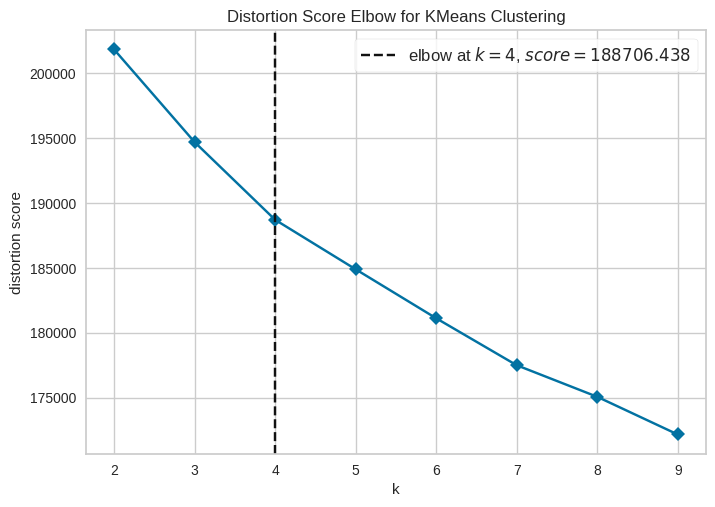

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [4]:

# Using Elbow Method to find optimal K
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10), timings=False)
visualizer.fit(df_scaled)
visualizer.show()



## 5️⃣ Apply K-Means Clustering

- **K-Means Clustering** groups similar data points into `K` clusters.
- We choose `K` based on the Elbow Method results.
- Each data point is assigned to the nearest cluster centroid.


In [5]:

# Choose optimal K from Elbow Method (assumed 4 here, change if needed)
optimal_k = 4

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_scaled["Cluster"] = kmeans.fit_predict(df_scaled)

# Show Cluster Distribution
df_scaled["Cluster"].value_counts()


,count
Cluster,
1,3842
0,3832
3,3791
2,3769



## 6️⃣ Visualizing the Clusters using PCA

- **PCA (Principal Component Analysis)** reduces the dataset dimensions for visualization.
- A 2D scatter plot shows clusters in a transformed feature space.


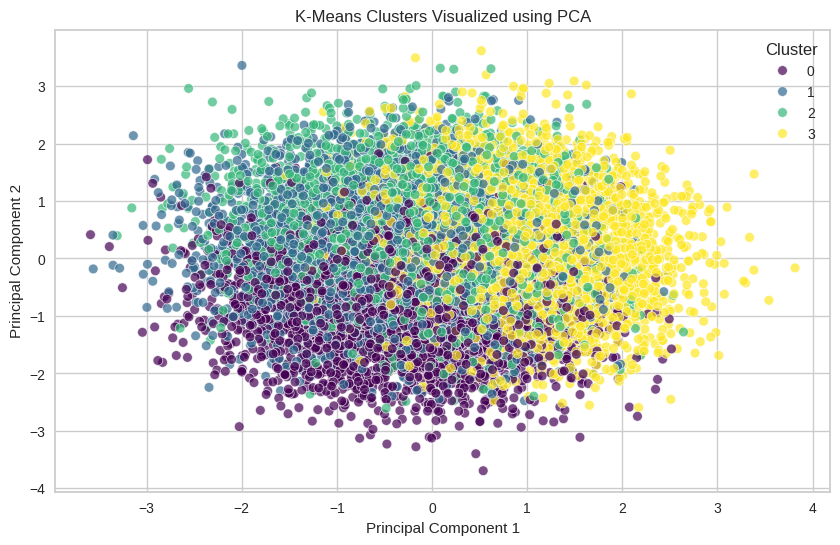

In [6]:

# Reduce dimensions to 2D for visualization using PCA
pca = PCA(n_components=2)
df_scaled["PCA1"] = pca.fit_transform(df_scaled.drop(columns=["Cluster"]))[:, 0]
df_scaled["PCA2"] = pca.fit_transform(df_scaled.drop(columns=["Cluster"]))[:, 1]

# Plot the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_scaled, x="PCA1", y="PCA2", hue="Cluster", palette="viridis", alpha=0.7)
plt.title("K-Means Clusters Visualized using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()



## 📌 Final Summary

✅ **Step 1:** Load data and explore it.  
✅ **Step 2:** Encode categorical features & scale numerical features.  
✅ **Step 3:** Use the **Elbow Method** to find the best number of clusters.  
✅ **Step 4:** Apply **K-Means Clustering** to group similar data.  
✅ **Step 5:** **Visualize clusters** using PCA for business insights.  

### 🔹 Next Steps
- **Analyze cluster characteristics** (e.g., which cluster has high revenue?).  
- **Tune K-Means parameters** (e.g., different K, use hierarchical clustering).  
- **Use this clustering for business strategies** (e.g., marketing segmentation).  

🚀 **Let's analyze the business impact of these clusters!**  
